In [1]:
# Getting Python ready
import matplotlib.pyplot as plt
import math
import random

#Question 1(a)

The function below simulates the Bernoulli trial n times and plot the outcome of each trial against the trail number

p- probability of success

n- number of times bernoulli experiment is repeated

The random functions generates a number between 0 and 1 and if the number is less than or equal to p, it is considered as head(1) otherwise as a tail(0). Then the functions plots the above observation.

In [2]:
def bernoulli(n,p):
  # Set up the plot
  plt.title("Bernoulli("+str(n)+","+str(p)+")")
  plt.xlabel("Trial number")
  plt.ylabel("Outcome")

  # Generate the outcomes of the trials
  y1=[]
  x1=[]
  for i in range(1,n+1):
      if(random.random()<=p):
          y1.append(1) #head
      else:
          y1.append(0)
      x1.append(i)

  # Plot the outcomes as a step function
  plt.step(x1, y1)
  plt.show()

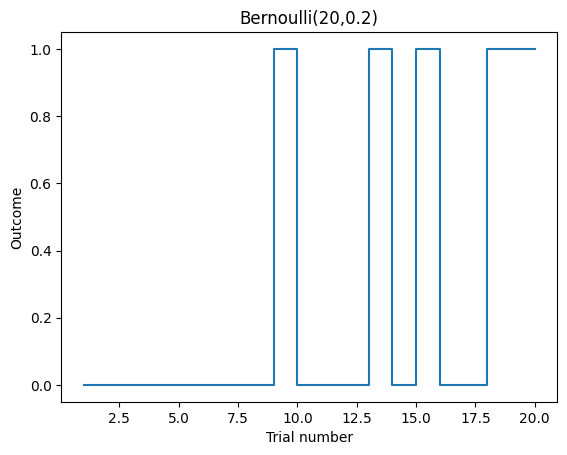

In [3]:
bernoulli(20,0.2)

Expected value of success in n trials is n*p=(20)*(.2)=4


Which is approximately the value of outcome, the difference is due to less number of trials conducted

the value will converge to the expected value if we increase the number of experiments.

---



# Question 1(b)
The function below simulates the above function, just the difference is that it plot the function in the grid corresponding to ax[num1][num2]



1.   The first five graphs shows the bernoulli experiment conducted 5 times on different graphs
2.   The last graph shows the bernoulli experiment conducted 5 times on single graph




In [4]:
def ber_subplot(n,p,num1,num2):

  # Generating the outcomes
  y=[]
  x=[]
  for i in range(1,n+1):
      if(random.random()<=p):
          y.append(1) #head
      else:
          y.append(0)
      x.append(i)

  # Setting up the plot and graphing the outcomes
  ax[num1][num2].set_xlabel("Trial number")
  ax[num1][num2].set_ylabel("Outcome")
  ax[num1][num2].step(x, y)

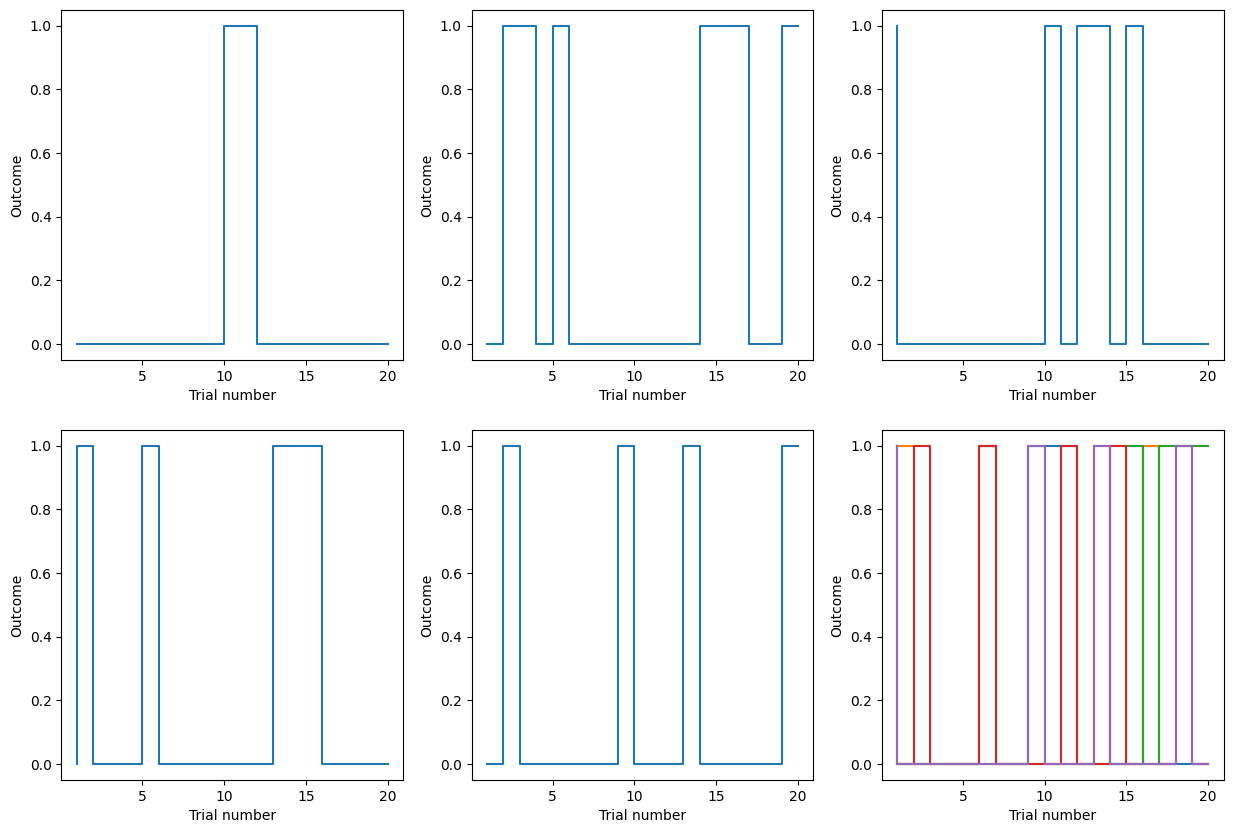

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, figsize=(15,10))

ber_subplot(20,0.2,0,0)
ber_subplot(20,0.2,0,1)
ber_subplot(20,0.2,0,2)
ber_subplot(20,0.2,1,0)
ber_subplot(20,0.2,1,1)

ber_subplot(20,0.2,1,2)
ber_subplot(20,0.2,1,2)
ber_subplot(20,0.2,1,2)
ber_subplot(20,0.2,1,2)
ber_subplot(20,0.2,1,2)


plt.show()

In the above graphs we observe that even though the graphs does not match the expected value they are close to the expected value and on summing all these we get more closer to the expected value.

The expected value is 0.2 in a single trail i.e. if we perform experiment 5 times it is expected that out of that 5 one of them would have a value 5.

---



#Question 1(c)

The function below takes 3 arguments:-
1. n- number of trials in experiment
2. p- probability of success of each trial
3. num_exp- number of times the experiment is conducted

obs store the obervation of an experiment, the sum of obs gives us the number of success in the experiment, which is then repeated num_exp times to obtain the distribution.

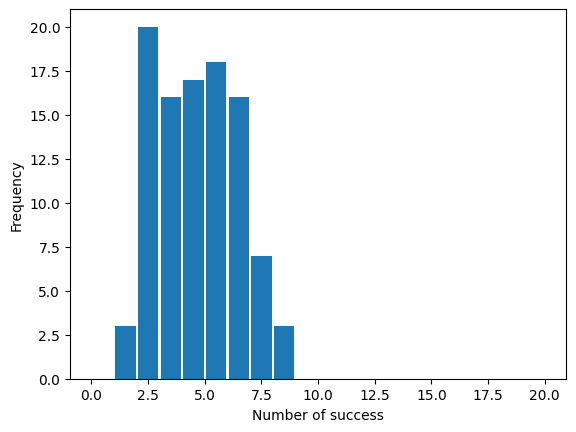

In [6]:
def binomail_app(n,p,num_exp):
  y=[]
  for j in range(num_exp):
      obs=[]
      for i in range(1,n+1):
          if(random.random()<=p):
              obs.append(1) #head
          else:
              obs.append(0)
      y.append(sum(obs))
  plt.xlabel("Number of success")
  plt.ylabel("Frequency")
  # plt.title('xlabels() function')
  plt.hist(y,n,rwidth=0.9,range=[0,20])
  plt.show()
binomail_app(20,0.2,100)

The above graphs approximate to binomial distribution as we are observing number  of success in n trails.

The expected value of binomial random variable is np=(20)*(0.2)=4
Thus we have the peak around four and decreasing when we go further left or right, the anomilies are due to the less number of experiments conducted, becuase as we increase the number of experiments conducted it would converge into a binomial random variable.


---

#Question 1d

In the function below replicates the above function but also filter out the observation whose value is less than 3.

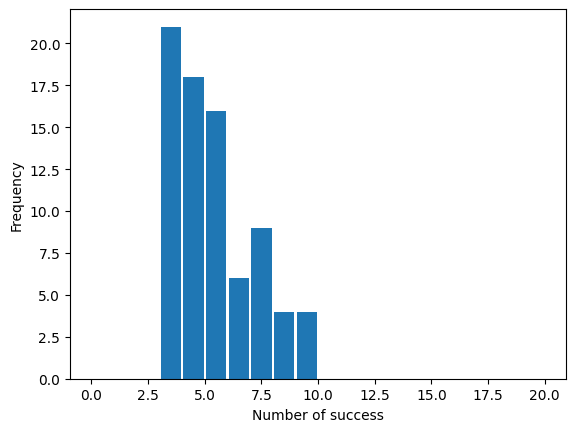

In [7]:
def binomial_shifted(n,p,num_exp):
  y=[]
  for j in range(num_exp):
      obs=[]
      for i in range(1,n+1):
          if(random.random()<=p):
              obs.append(1) #head
          else:
              obs.append(0)
      if(sum(obs)>=3):
        y.append(sum(obs))
  plt.xlabel("Number of success")
  plt.ylabel("Frequency")
  plt.hist(y,n,rwidth=0.9,range=[0,20])
  plt.show()
binomial_shifted(20,0.2,100)

The above graph corresponds to a binomial which is shifted i.e. if the expected value of binomial is close to zero the graph looks like this, becuase we are discarding the values which are less than 3.


---



---



#Question2

In the function below it takes the values alpha(expected value in case of binomial) and p is probability of success in a trail, which is default set to 0.1, the number of trials in experiment is 10*aplha and the the number of experiment if 10,000.

In [8]:
def poisson(alpha,y_cor):
  n=10*alpha
  p=0.1
  number_exp=10000
  pois=[]
  for i in range(number_exp):
    count_pois=0
    temp=random.random()
    while(temp>0):
        temp-=(alpha**count_pois)*(((math.e)**(-alpha))/math.factorial(count_pois))
        count_pois+=1
    pois.append(count_pois-1)
  ax[y_cor][1].hist(pois,400,range=[0,200],rwidth=0.9)
  ax[y_cor][1].set_title("poisson alpha="+str(alpha))
  ax[y_cor][1].set_xlabel("Number of success in a trial")
  ax[y_cor][1].set_ylabel("Frequency")

In [9]:
def binomial(alpha,y_cor):
    n=10*alpha
    p=0.1
    number_exp=10000
    frequency=[]
    for i in range(number_exp):
        count=0
        for j in range(n):
            if(random.random()<=p):
                count+=1
        frequency.append(count)
    ax[y_cor][0].hist(frequency,400,range=[0,200],rwidth=0.9)
    ax[y_cor][0].set_title("binomial("+str(n)+","+str(p)+")")
    ax[y_cor][0].set_xlabel("Number of success in a trial")
    ax[y_cor][0].set_ylabel("Frequency")

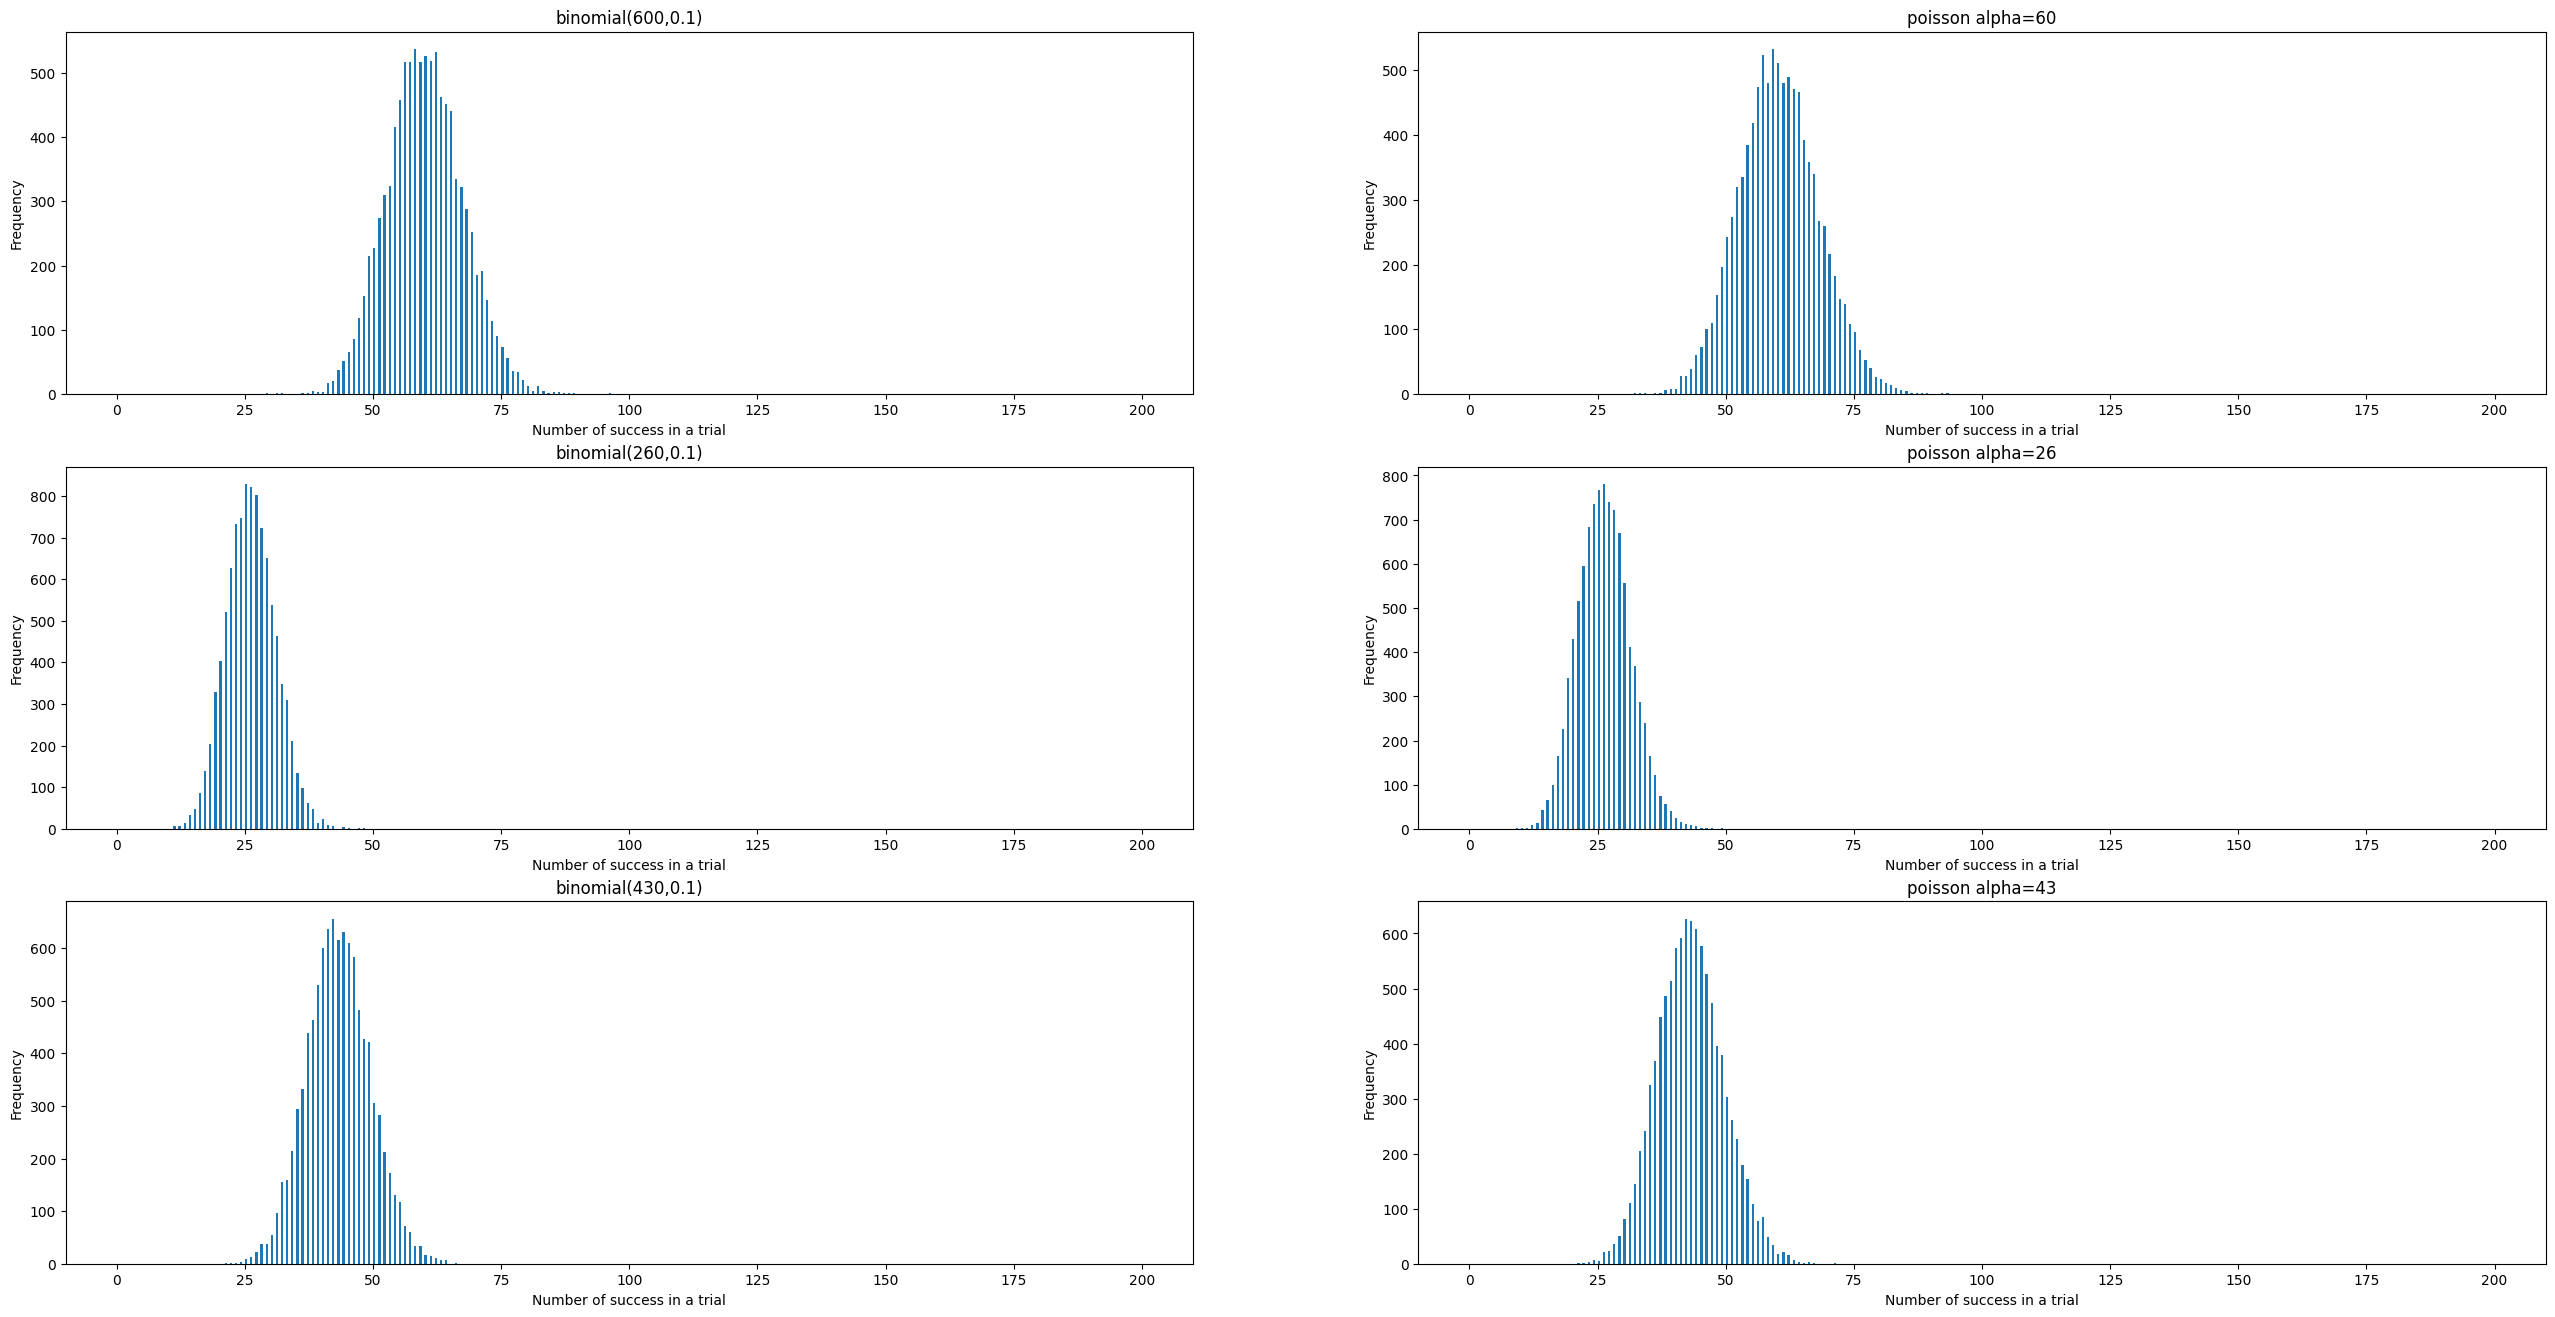

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(32,16))
a=random.randint(0, 100)# a=n*p , expected value of alpha
binomial(a,0)
poisson(a,0)
a=random.randint(0, 100)
binomial(a,1)
poisson(a,1)
a=random.randint(0, 100)
binomial(a,2)
poisson(a,2)
plt.show()

The graphs of binomial and poisson look visually similar as binomial tends to infinity, it approximates to the poisson random variable.

As we can see binomial takes the expected value n*p, which is set same to the expected value of the poisson random variable which is equal to alpha.

Since the expected values of both random variables are same and as number of experiments tends the infinity the binomial graph converges into the graph of poisson random variable.


---



---